In [83]:
import datetime as dt
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import pandas as pd

In [77]:
brightness_data = pd.read_table("fsmi_bright_2008-02.txt", delimiter=' ')

In [79]:
squash = brightness_data.drop(['Time'], axis=1)
squash = squash.max(axis=1)
brightness_data['Brightness'] = squash
brightness_data['Time'] = brightness_data['Time'].apply(lambda x: x.split('/'))
brightness_data['Time'] = brightness_data['Time'].apply(lambda x: [x[0].split('-'), x[1].split('-')[0].split(':')])
brightness_data['Time'] = brightness_data['Time'].apply(lambda x: dt.datetime(year=int(x[0][0]), 
                                                                              month=int(x[0][1]), 
                                                                              day=int(x[0][2]),
                                                                              hour=int(x[1][0]),
                                                                              minute=int(x[1][1]),
                                                                              second=int(x[1][2])))
brightness_data = brightness_data.drop(brightness_data.columns[[1, 2, 3, 4]],axis = 1)

In [80]:
brightness_data

,Time,Brightness
0,2008-02-01 02:28:48,23475746.0
1,2008-02-01 02:28:51,23441080.0
2,2008-02-01 02:28:54,23438828.0
3,2008-02-01 02:28:57,23527046.0
4,2008-02-01 02:29:00,23521878.0
...,...,...
411424,2008-02-29 13:01:51,200193536.0
411425,2008-02-29 13:01:54,200516816.0
411426,2008-02-29 13:01:57,200596208.0
411427,2008-02-29 13:02:00,202666816.0


In [90]:
def plot_brightness_over_time(results):
    fig = plt.figure(figsize=(24, 8))
    ax = fig.gca()
    plt.title("Aurora Brightness 2008-02")
    plt.ylabel("Brightness")
    plt.xlabel("Time")
    plt.plot(results['Time'], results['Brightness'], label='Brightness')
    ax.xaxis.set_major_locator(mdates.DayLocator(interval=1))
    plt.xticks(rotation=45)
    plt.grid()

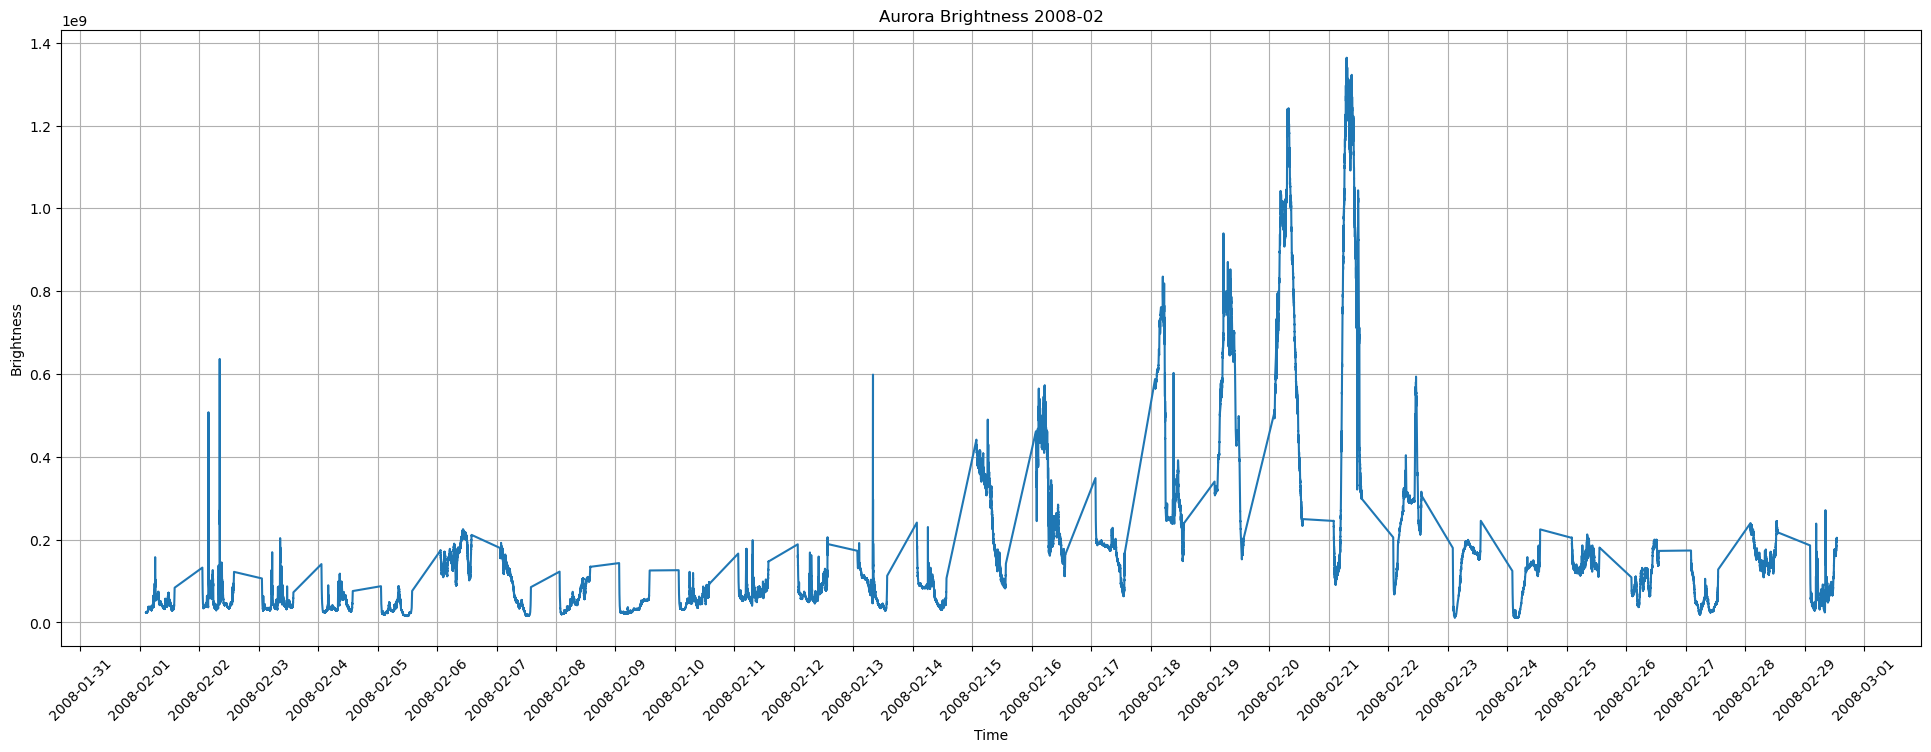

In [91]:
plot_brightness_over_time(brightness_data)